In [10]:
import glob
import fileinput
input_lines = []
for file in glob.glob("D:/nltk_data/corpora/gutenberg/*.txt", recursive = True):
        with open('result.txt', 'w') as f:
            input_lines.extend(fileinput.input(file))
            f.writelines(input_lines)


In [11]:
#using function 
from operator import itemgetter
dic = {}

def word_gen(file):
    contents = fu.read()
    for word in contents.split():
        word = word.lower()
        import string
        for c in string.punctuation:
            word= word.replace(c,"")
    
# check for words in () or []
        if word.startswith('[') or word.startswith('('):
            word = word[1:]
        if word.endswith(']') or word.endswith(')'):
            word = word[:-1]
        
# check for words that end with punctuation
        if word.endswith('.') or word.endswith(',') or word.endswith(';') or word.endswith(':'):
            word = word[:-1]
# if word is in dictionary, increment the value
# otherwise add the word to dictionary with value 1
        if word.isalpha()==True:
            if word in dic:
                dic[word] += 1
            else:
                dic[word] = 1
        
# this prints the dict out sorted by value
    top_words = sorted(dic.items(), key=itemgetter(1), reverse=True)[:200]
    for word, frequency in top_words:
        print ("%s %d" % (word, frequency))
        return dic


In [12]:
fu = open("result.txt","r")
var = word_gen(fu)

the 133211


In [13]:
len(var)

53328

In [16]:
rankassignment={key: rank for rank, key in enumerate(sorted(var, key=var.get, reverse=True), 1)}

In [32]:
newdict={}
for k,v in rankassignment.items():
    if(k in var.keys()):
        #print(k,v)
        newdict[v]={}
        newdict[v]['word']=k
        newdict[v]['freq']=var[k]
    else:
        break
        

In [41]:
import csv
row=[]
row.append('word,frequency,rank\n')
for k,v in newdict.items():
    var1=v['word']
    var2=v['freq']
    var3=k
    row.append(str(var1)+','+str(var2)+','+str(var3)+'\n')

with open('rank.csv','w') as csv_file:
    for i in row:
        csv_file.write(i)

In [38]:
from pylab import *
import matplotlib.pyplot as plt
import csv

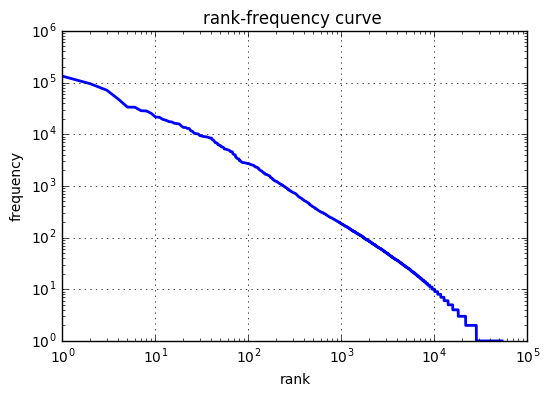

In [40]:
rank = []
freq = []
with open("C:/Users/vs/Documents/Python Scripts/Assignment 2/rank.csv") as file:
    file1 = csv.reader(file)
    next(file1)
    for r in file1:
        freq.append(int(r[1]))
        rank.append(int(r[2]))
    plt.loglog(rank[:], freq[:], linewidth=2.0)
    xlabel('rank')
    ylabel('frequency')
    title('rank-frequency curve ')
    grid(True)
    savefig('C:/Users/vs/Documents/Python Scripts/Assignment 2/graph.png')
    show()